In [71]:
import yfinance as yf
import pandas as pd
import gym
import gym_anytrading
import numpy as np
import matplotlib.pyplot as plt
from finta import TA
from gym_anytrading.envs import StocksEnv

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

In [72]:
df = yf.download('BTC-USD',start='2021-01-01', end='2022-01-01', interval='1d')

df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


C:\Users\USER\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (25, 2)
  logger.warn(
C:\Users\USER\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\USER\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\USER\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result r

info {'total_reward': 12332.90234375, 'total_profit': 0.5900142884837274, 'position': 0}


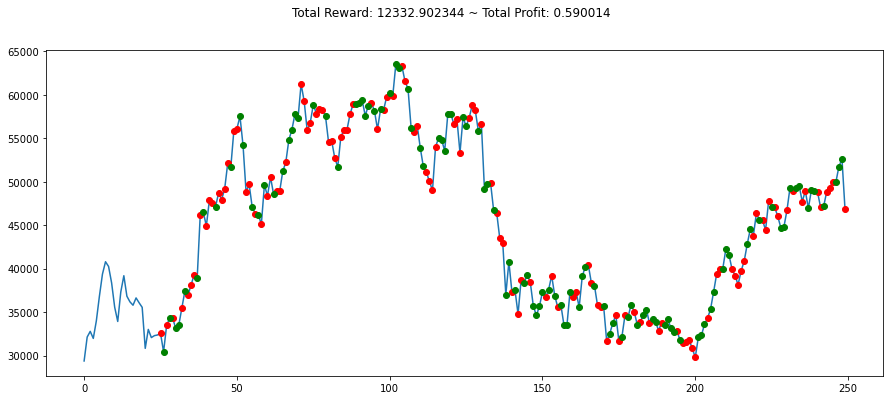

In [73]:
# Basic environement to test
window = 25
env = gym.make('stocks-v0', df=df, frame_bound=(window,250), window_size=window)

state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [74]:
# Add Indicators

df['RSI'] = TA.RSI(df, 14)
df['ADX'] = TA.ADX(df, 14)
df['BB_W'] = TA.BBWIDTH(df, 30)

df.dropna(inplace=True)

In [75]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'ADX','BB_W', 'RSI']].to_numpy()[start:end]
    return prices, signal_features

In [76]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,80))

In [77]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [78]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 358       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.683    |
|    explained_variance | -0.000152 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 291       |
|    value_loss         | 2.44e+05  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 338      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0.802    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.00602 |
|    va

------------------------------------
| time/                 |          |
|    fps                | 331      |
|    iterations         | 1700     |
|    time_elapsed       | 25       |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.678   |
|    explained_variance | 0.000165 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | -359     |
|    value_loss         | 2.29e+06 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 329       |
|    iterations         | 1800      |
|    time_elapsed       | 27        |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -0.678    |
|    explained_variance | 5.69e-05  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -5.12e+03 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 338       |
|    iterations         | 3300      |
|    time_elapsed       | 48        |
|    total_timesteps    | 16500     |
| train/                |           |
|    entropy_loss       | -0.678    |
|    explained_variance | 0.00108   |
|    learning_rate      | 0.0007    |
|    n_updates          | 3299      |
|    policy_loss        | -6.13e+03 |
|    value_loss         | 6.88e+07  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 339      |
|    iterations         | 3400     |
|    time_elapsed       | 50       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | 0.000306 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | -665     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 331      |
|    iterations         | 4900     |
|    time_elapsed       | 74       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | -0.00128 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | -89.7    |
|    value_loss         | 6.33e+05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 330      |
|    iterations         | 5000     |
|    time_elapsed       | 75       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0.0219   |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | -3.5     |
|    value_loss         | 111      |
-

KeyboardInterrupt: 

info {'total_reward': -867.17578125, 'total_profit': 0.5367884906792214, 'position': 0}


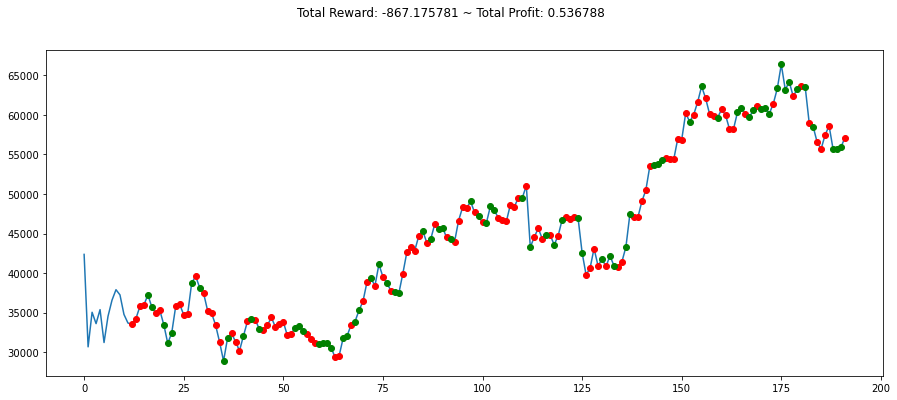

In [81]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(120,300))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()